In [2]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # came across seaborn during online troublshooting. had hard time creating the box plots I needed with plt.

In [3]:
# importing data for plot
big_data = pd.read_csv("galactic_data.csv")

In [4]:
# converting to pandas DataFrame
big_data = pd.DataFrame(big_data)
print(big_data)

       Galaxy Name    m-M   err       D    Method              REFCODE  \
0        UGC 12914  33.57   0.2  51.800    Sosies  2002A&A...393...57T   
1              WLM   25.1  0.15   1.050  Cepheids  1991PASP..103..933M   
2              WLM  24.92  0.21   0.964  Cepheids  2004ApJ...608...42S   
3              WLM  24.75   0.1   0.891      TRGB  1997AJ....114..147M   
4              WLM  24.77  0.09   0.899      TRGB  2004ApJ...608...42S   
..             ...    ...   ...     ...       ...                  ...   
174  SMC, NGC 0292  18.96   ...   0.062  Cepheids  1999ApJ...522..250S   
175  SMC, NGC 0292  18.98  0.28   0.063  Cepheids  1999ApJ...512..711B   
176  SMC, NGC 0292  18.98  0.02   0.063  Cepheids  1997ApJ...491...13K   
177  SMC, NGC 0292  18.99  0.05   0.063  Cepheids  2004ApJ...608...42S   
178  SMC, NGC 0292  18.99  0.05   0.063  Cepheids  2000ApJS..128..431F   

            Notes       RA        Dec   GLON  GLAT Type (RC3) Vgsr (RC3)  
0             NaN  0:01:38        Na

In [5]:
# extracting relevant columns
df = pd.DataFrame({
    "columns" : big_data["Method"],
    "values" : big_data["err"]
})    
df["values"] = pd.to_numeric(df["values"], errors="coerce") # learned to do this from statology.org: "How to Use to_numeric in Pandas (With Examples)"

In [6]:
# cleaning data. if either the method or error is empty, it will mess up my plot
clean_data = df.dropna() # learned dropna from geeksforgeeks.org: "Pandas DataFrame.dropna() Method


In [7]:
# was curious to know how many boxes would be made so I could gauge how big to make things
print(len(clean_data["columns"].unique()))

15


In [48]:
# checking if data is clean
print(clean_data)

      columns  values
0      Sosies    0.20
1    Cepheids    0.15
2    Cepheids    0.21
3        TRGB    0.10
4        TRGB    0.09
..        ...     ...
173  Cepheids    0.04
175  Cepheids    0.28
176  Cepheids    0.02
177  Cepheids    0.05
178  Cepheids    0.05

[129 rows x 2 columns]


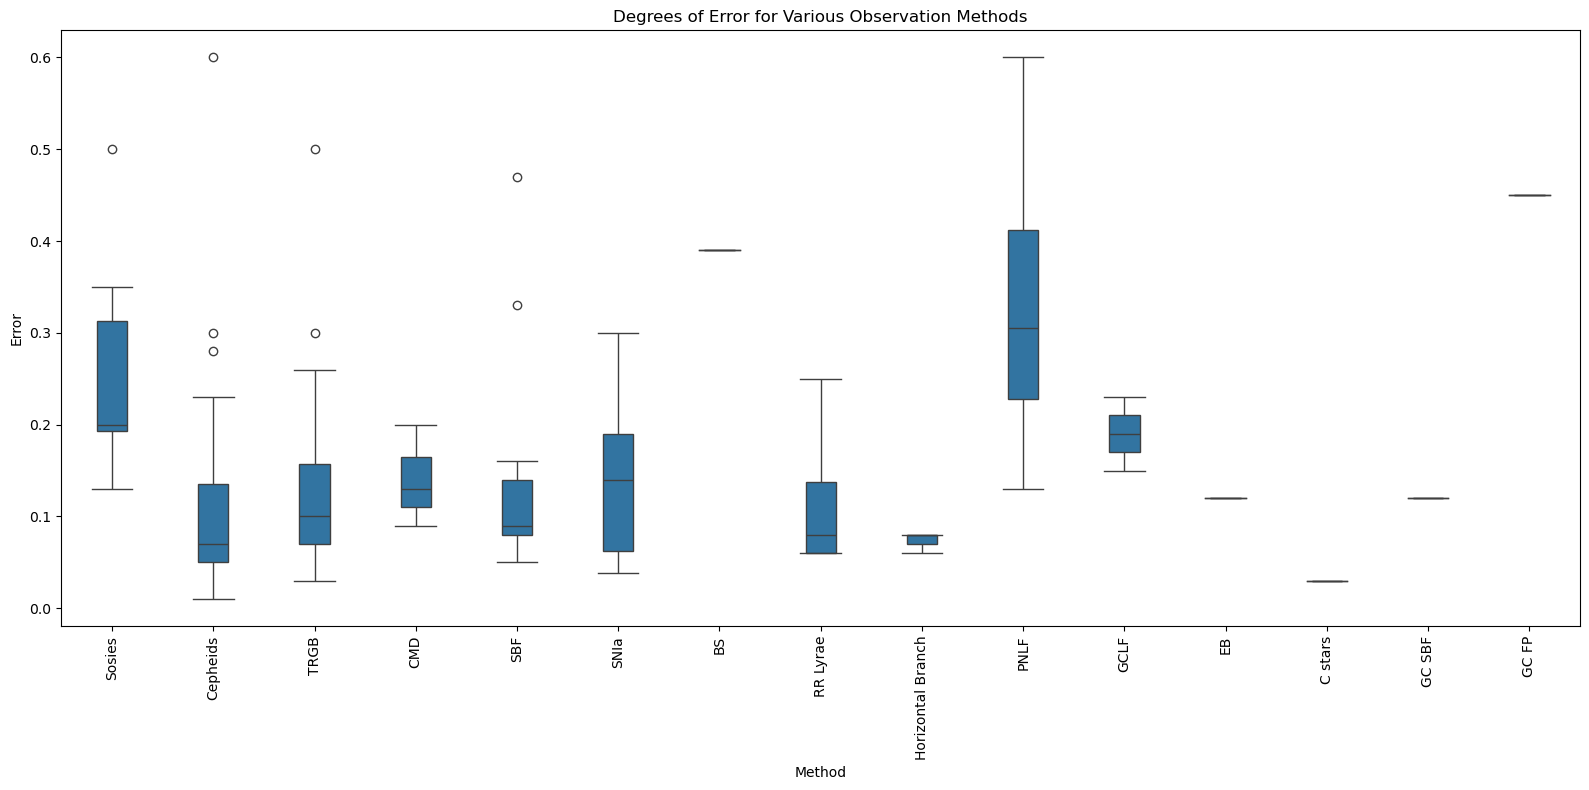

In [49]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="columns", y="values", data=clean_data, widths = 0.3, ) # learned this syntax from statology.org: "Seaborn: How to Create a Boxplot of Multiple Columns"
plt.title("Degrees of Error for Various Observation Methods")
plt.xlabel("Method")
plt.xticks(rotation="vertical")
plt.ylabel("Error")
plt.tight_layout() # learned this in ULAB
plt.show()